In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv("05-Matplotlib_Instructions_Pyber_data_city_data.csv")
ride_data = pd.read_csv("05-Matplotlib_Instructions_Pyber_data_ride_data.csv")

# Combine the data into a single dataset

merged_df = ride_data.merge(city_data, left_on='city', right_on='city')

# Display the data table for preview

merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2018 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2018 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2018 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2018 14:14,13.89,4.242550e+11,5,Urban


In [2]:
avg_fare = merged_df.groupby(["city"])["fare"].mean()
avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [3]:
avg_fare = avg_fare.to_frame(name='avg_fare')
avg_fare.head()

,avg_fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [4]:
test = avg_fare.merge(merged_df, left_on='city', right_on='city')
test.head()

,city,avg_fare,date,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban
1,Amandaburgh,24.641667,2/24/2018 23:10,43.66,6.573820e+12,12,Urban
2,Amandaburgh,24.641667,2/10/2018 20:42,36.17,6.455620e+12,12,Urban
3,Amandaburgh,24.641667,1/11/2018 2:22,29.24,7.279900e+12,12,Urban
4,Amandaburgh,24.641667,1/21/2018 4:12,9.26,5.528430e+12,12,Urban


In [5]:
no_duplicates = test.drop_duplicates("city", keep = "first")
no_duplicates.head()

,city,avg_fare,date,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban
18,Barajasview,25.332273,1/15/2018 2:59,19.52,8.268110e+12,26,Urban
40,Barronchester,36.422500,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban
56,Bethanyland,32.956111,4/1/2018 22:04,38.71,8.221080e+12,22,Suburban
74,Bradshawfurt,40.064000,3/6/2018 21:44,19.74,6.080370e+12,7,Rural


In [6]:
total_rides = test['city'].value_counts()

total_rides.head()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
Name: city, dtype: int64

In [7]:
total_rides = total_rides.to_frame().reset_index()
total_rides.head()

,index,city
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Port Frank,33
4,Liumouth,33


In [8]:
total_rides.columns = ['city', 'rides']
total_rides.head()

,city,rides
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Port Frank,33
4,Liumouth,33


In [9]:
no_duplicates.dtypes

city             object
avg_fare        float64
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [10]:
no_duplicates = pd.merge(no_duplicates, total_rides, on="city")
no_duplicates.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban,18
1,Barajasview,25.332273,1/15/2018 2:59,19.52,8.268110e+12,26,Urban,22
2,Barronchester,36.422500,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban,16
3,Bethanyland,32.956111,4/1/2018 22:04,38.71,8.221080e+12,22,Suburban,18
4,Bradshawfurt,40.064000,3/6/2018 21:44,19.74,6.080370e+12,7,Rural,10


In [11]:
rural = no_duplicates[no_duplicates["type"] == "Rural"]
rural.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
4,Bradshawfurt,40.064000,3/6/2018 21:44,19.74,6.080370e+12,7,Rural,10
17,Garzaport,24.123333,2/18/2018 18:27,36.16,2.928340e+12,7,Rural,3
20,Harringtonfort,33.470000,1/6/2018 7:38,47.33,3.849750e+12,4,Rural,6
24,Jessicaport,36.013333,1/1/2018 9:45,43.69,2.424880e+12,1,Rural,6
33,Lake Jamie,34.358333,3/13/2018 6:41,26.09,1.599160e+12,4,Rural,6


In [12]:
urban = no_duplicates[no_duplicates["type"] == "Urban"]
urban.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban,18
1,Barajasview,25.332273,1/15/2018 2:59,19.52,8.268110e+12,26,Urban,22
6,Carriemouth,28.314444,2/25/2018 8:26,32.37,6.918430e+12,52,Urban,27
7,Christopherfurt,24.501852,4/17/2018 2:25,23.30,7.819060e+12,41,Urban,27
10,Deanville,25.842632,4/25/2018 3:29,41.52,6.055930e+12,49,Urban,19


In [13]:
suburban = no_duplicates[no_duplicates["type"] == "Suburban"]
suburban.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
2,Barronchester,36.422500,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban,16
3,Bethanyland,32.956111,4/1/2018 22:04,38.71,8.221080e+12,22,Suburban,18
5,Brandonfort,35.437368,1/14/2018 12:35,28.02,8.100260e+12,10,Suburban,19
8,Colemanland,30.894545,4/20/2018 2:52,20.83,2.981570e+12,23,Suburban,22
9,Davidfurt,31.995882,1/5/2018 13:42,31.48,1.953920e+12,23,Suburban,17


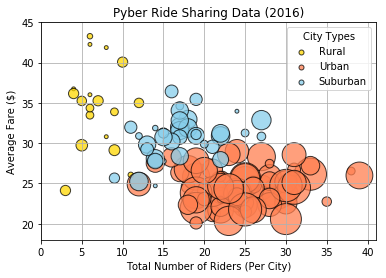

In [14]:
plt.scatter(rural['rides'], rural['avg_fare'], s=rural['driver_count']*15, color="Gold", label="Rural", alpha=0.75, edgecolors="black")
plt.scatter(urban['rides'], urban['avg_fare'], s=urban['driver_count']*15, color="Coral", label="Urban", alpha=0.75, edgecolors="black")
plt.scatter(suburban['rides'], suburban['avg_fare'], s=suburban['driver_count']*15, color="SkyBlue", label="Suburban", alpha=0.75, edgecolors="black")
plt.grid()
plt.xlim(0, 41)
plt.ylim(18, 45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(title="City Types", loc="best")
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]
plt.savefig("Bubble")
plt.show()

In [15]:
rural_rides = rural.sum()['rides']
rural_rides

125

In [16]:
urban_rides = urban.sum()['rides']
urban_rides

1625

In [17]:
suburban_rides = suburban.sum()['rides']
suburban_rides

625

In [18]:
no_duplicates.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban,18
1,Barajasview,25.332273,1/15/2018 2:59,19.52,8.268110e+12,26,Urban,22
2,Barronchester,36.422500,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban,16
3,Bethanyland,32.956111,4/1/2018 22:04,38.71,8.221080e+12,22,Suburban,18
4,Bradshawfurt,40.064000,3/6/2018 21:44,19.74,6.080370e+12,7,Rural,10


In [19]:
total_fares = merged_df.groupby(["type"])["fare"].sum()
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

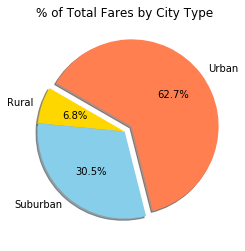

In [20]:
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_fares, startangle=150, explode=explode, colors=colors, shadow=True, labels = total_fares.index, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
plt.show

# Save Figure

plt.savefig("..TotalFaresbyCityType")

In [21]:
type_group = no_duplicates.groupby('type')["type", "fare", "rides", "driver_count"]
total_rides = type_group.sum()['rides']

In [22]:
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: rides, dtype: int64

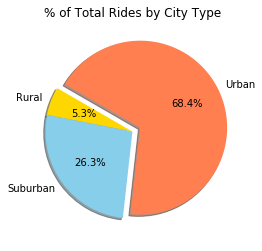

In [23]:
# Total Fares by City Type
# Calculate Type Percents

# Build Pie Chart

colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_rides, startangle=150, explode=explode, colors=colors, shadow=True, labels = total_rides.index, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.show

# Save Figure

plt.savefig("..TotalRidesbyCityType")

In [24]:
no_duplicates.head()

,city,avg_fare,date,fare,ride_id,driver_count,type,rides
0,Amandaburgh,24.641667,3/5/2018 2:15,26.28,9.068510e+11,12,Urban,18
1,Barajasview,25.332273,1/15/2018 2:59,19.52,8.268110e+12,26,Urban,22
2,Barronchester,36.422500,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban,16
3,Bethanyland,32.956111,4/1/2018 22:04,38.71,8.221080e+12,22,Suburban,18
4,Bradshawfurt,40.064000,3/6/2018 21:44,19.74,6.080370e+12,7,Rural,10


In [25]:
total_drivers = no_duplicates.groupby(["type"])["driver_count"].sum()
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

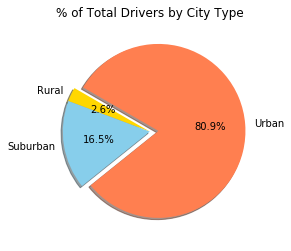

In [26]:
# Total Fares by City Type
# Calculate Type Percents

# Build Pie Chart

colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_drivers, startangle=150, explode=explode, colors=colors, shadow=True, labels = total_drivers.index, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
plt.show

# Save Figure

plt.savefig("..TotalDriversbyCityType")

In [ ]:
# Three Trends:
# 1.	More people are riding in cities than outside of cities but the fares are typically smaller per ride
# 2.	Rural has the least amount of riders but the highest variance of fares
# 3.	There are a lot more drivers in cities than outside, particularly rural
